# Loading Data

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

LE = LabelEncoder()
MMS = MinMaxScaler()

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

X[X.columns] = MMS.fit_transform(X[X.columns])
y = LE.fit_transform(y)

# Model Building

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

# Metrics

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = 'weighted')

print(f'Confusion matrix:\n{cm}')
print(f'Precision score: {precision}')
print(f'Recall score: {recall}')
print(f'Accuracy score: {accuracy}')
print(f'F1 score: {f1}')

Confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Precision score: 1.0
Recall score: 1.0
Accuracy score: 1.0
F1 score: 1.0


# Visualization

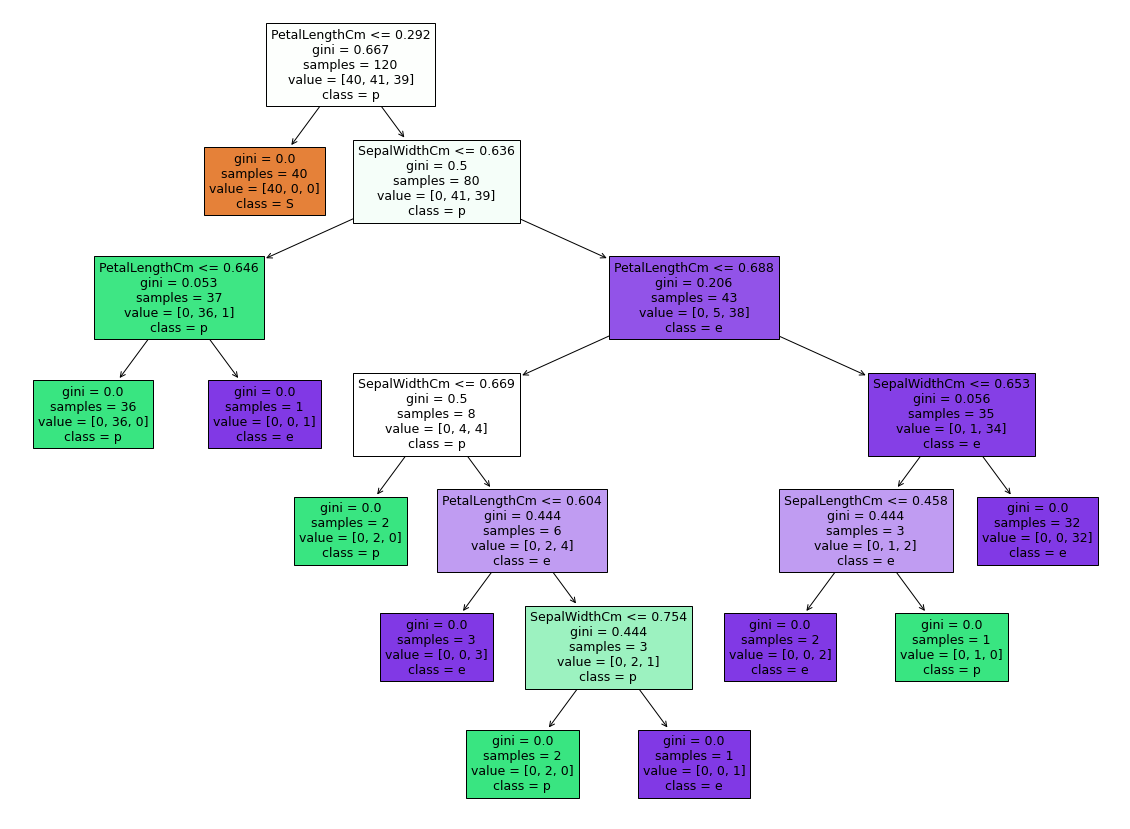

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize = (20, 15))
plot_tree(DTC, feature_names = df.columns[:-1], class_names = df.columns[-1], filled = True)
plt.show()